In [48]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input, VGG16, decode_predictions
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

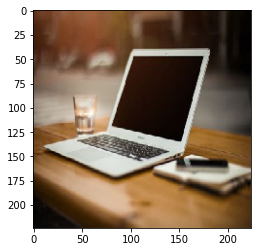

In [49]:
im_orig = load_img("laptop.jpeg", target_size=(224,224)) # download from http://www.cs.rpi.edu/~gittea/teaching/fall2020/files/laptop.jpeg
plt.imshow(im_orig)

In [50]:
im = img_to_array(im_orig)
im = np.expand_dims(im, axis=0)
im = preprocess_input(im)

In [51]:
model = VGG16()
model.summary()

553467904/553467096 [==============================] - 122s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

In [28]:
yhat = model.predict(im)
labels = decode_predictions(yhat, top=5)

<BarContainer object of 5 artists>

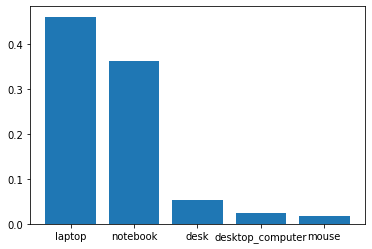

In [37]:
names = np.array(labels[0])[:,1]
confidences = np.array(labels[0])[:,2].astype(float)
plt.bar(names, confidences)

In [42]:
vgg19_featuremap = Sequential(model.layers[:-3])
vgg19_featuremap.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [45]:
vgg19_featuremap.predict(im)

(25088,)